In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
#data collection
dt = pd.read_csv('diabetes.csv')

In [9]:
dt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# checking rows and column number
dt.shape

(768, 9)

In [11]:
#checking statistical measures of the data
dt.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Outcome', ylabel='count'>

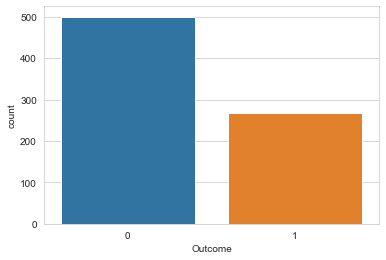

In [14]:
#counterplot of Outcome
sns.set_style('whitegrid')
sns.countplot(x='Outcome',data=dt)

In [15]:
## Checking for missing entries
dt.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
#comparing features for both diabetic and non diabetic people
dt.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


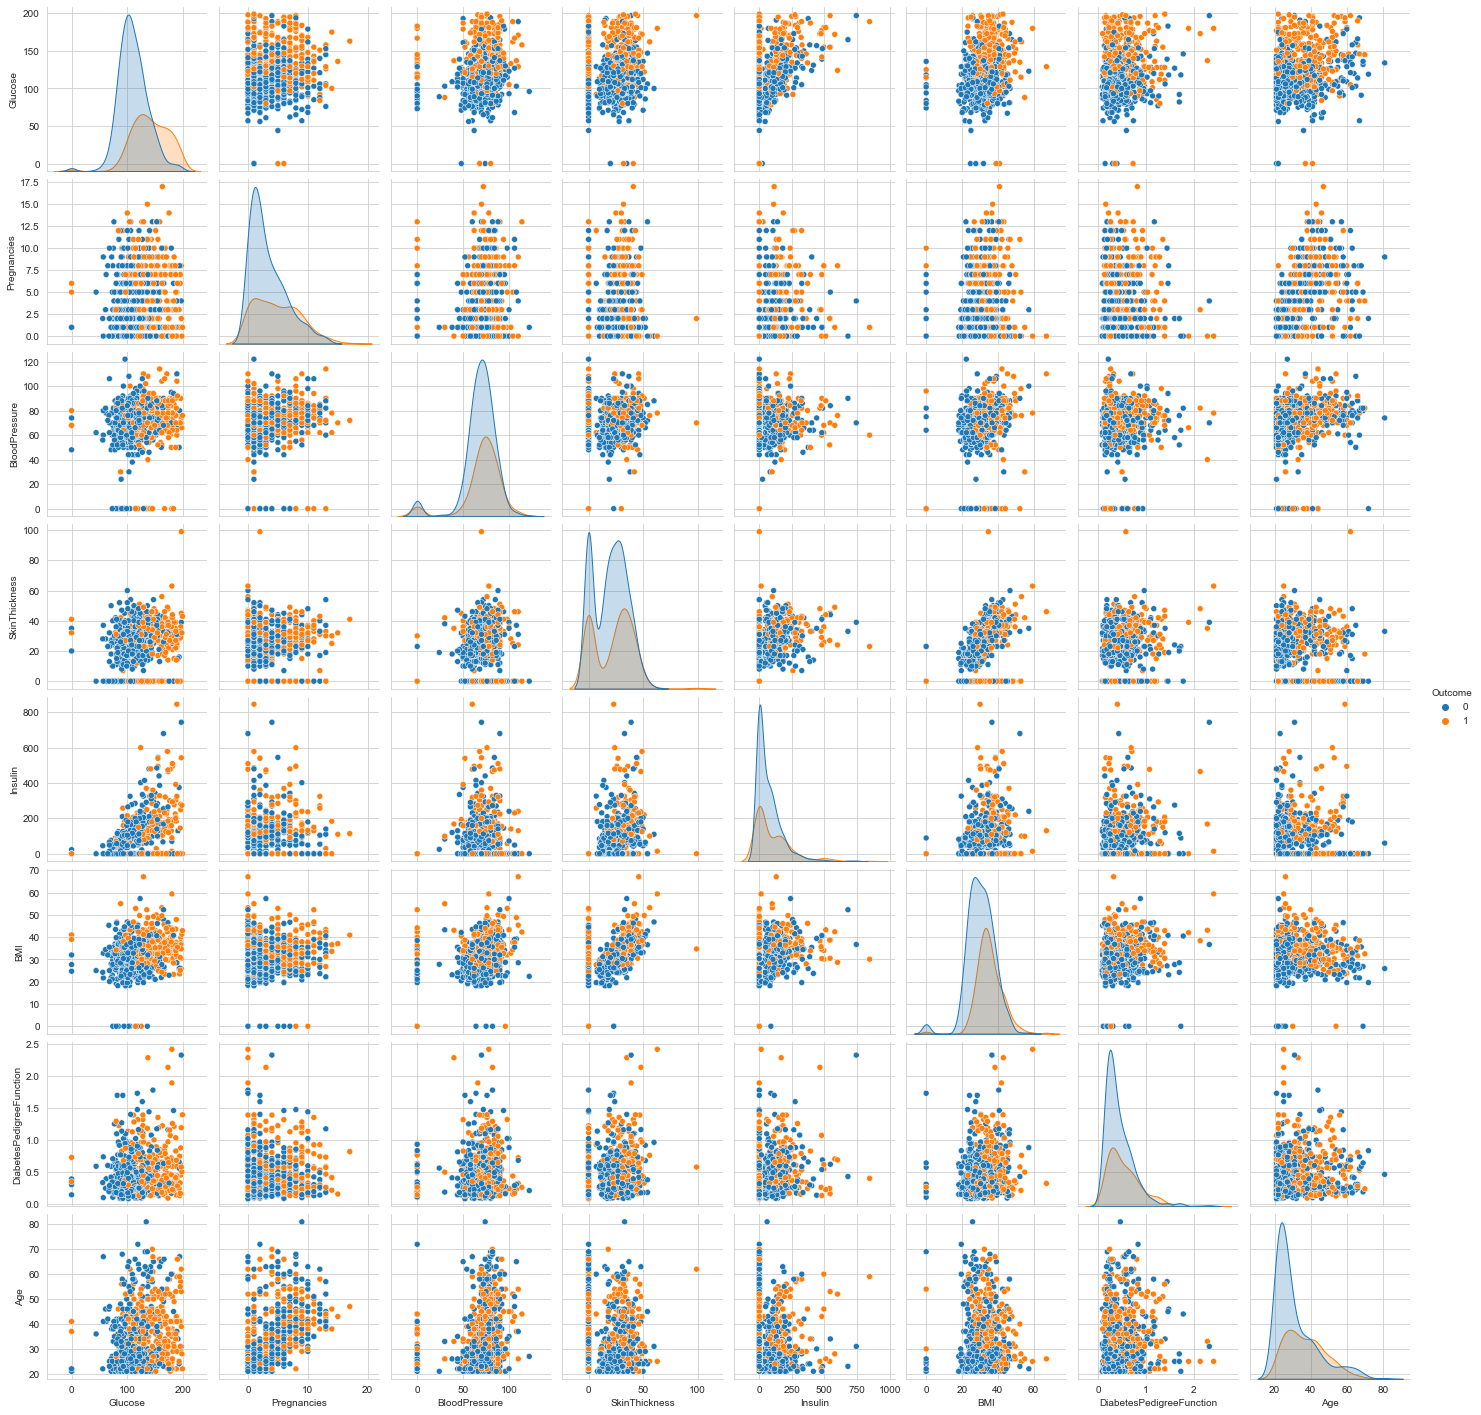

In [17]:
#scatterplotting
sns.pairplot(dt, hue = 'Outcome', vars = ['Glucose','Pregnancies','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])

In [24]:
#outliers

<AxesSubplot:xlabel='Glucose', ylabel='SkinThickness'>

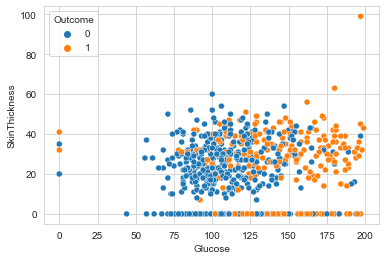

In [25]:
sns.scatterplot(x = 'Glucose', y = 'SkinThickness', hue = 'Outcome', data = dt)

<AxesSubplot:xlabel='BloodPressure', ylabel='SkinThickness'>

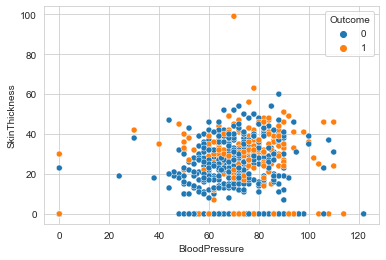

In [26]:
sns.scatterplot(x = 'BloodPressure', y = 'SkinThickness', hue = 'Outcome', data = dt)

<AxesSubplot:xlabel='Insulin', ylabel='BMI'>

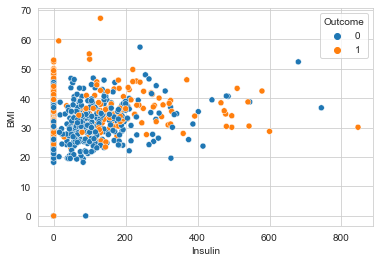

In [27]:
sns.scatterplot(x = 'Insulin', y = 'BMI', hue = 'Outcome', data = dt)

<AxesSubplot:xlabel='Insulin', ylabel='DiabetesPedigreeFunction'>

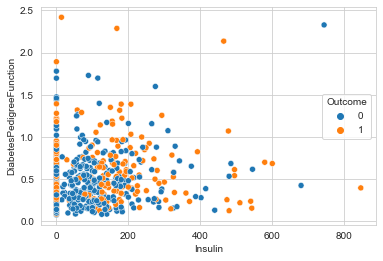

In [28]:
sns.scatterplot(x = 'Insulin', y = 'DiabetesPedigreeFunction', hue = 'Outcome', data = dt)

In [29]:
dtnumeric = dt[['Glucose','SkinThickness','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction']]

In [30]:
dtnumeric.head()

,Glucose,SkinThickness,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction
0,148,35,72,0,33.6,0.627
1,85,29,66,0,26.6,0.351
2,183,0,64,0,23.3,0.672
3,89,23,66,94,28.1,0.167
4,137,35,40,168,43.1,2.288


In [31]:
from scipy import stats

In [32]:
# calculating zscore of numeric columns in the dataset
z = np.abs(stats.zscore(dtnumeric))
print(z)

[[0.84832379 0.90726993 0.14964075 0.69289057 0.20401277 0.46849198]
 [1.12339636 0.53090156 0.16054575 0.69289057 0.68442195 0.36506078]
 [1.94372388 1.28821221 0.26394125 0.69289057 1.10325546 0.60439732]
 ...
 [0.00330087 0.15453319 0.14964075 0.27959377 0.73518964 0.68519336]
 [0.1597866  1.28821221 0.47073225 0.69289057 0.24020459 0.37110101]
 [0.8730192  0.65635768 0.04624525 0.69289057 0.20212881 0.47378505]]


In [33]:
# Defining threshold for filtering outliers 
threshold = 3
print(np.where(z > 3))

(array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
        78,  81,  81, 111, 145, 153, 172, 177, 182, 186, 193, 220, 222,
       228, 228, 247, 261, 266, 269, 286, 300, 330, 332, 336, 342, 347,
       349, 357, 370, 370, 371, 371, 395, 409, 415, 426, 426, 430, 435,
       445, 445, 453, 468, 484, 486, 494, 494, 502, 522, 522, 533, 535,
       579, 584, 589, 593, 601, 604, 619, 621, 643, 645, 655, 673, 684,
       695, 697, 703, 706, 706, 753], dtype=int64), array([5, 2, 3, 4, 3, 2, 5, 2, 4, 5, 2, 4, 0, 2, 2, 4, 3, 4, 3, 2, 4, 0,
       3, 2, 3, 2, 3, 5, 3, 2, 2, 2, 3, 2, 5, 2, 2, 0, 2, 0, 2, 3, 5, 4,
       5, 5, 3, 3, 2, 4, 2, 2, 4, 5, 2, 2, 2, 3, 2, 4, 0, 2, 4, 2, 2, 1,
       3, 2, 5, 2, 2, 2, 5, 2, 3, 3, 4, 4, 3, 2, 2, 2, 4, 3], dtype=int64))


In [34]:
#filtering outliers retaining only those data points which are below threshhold
dt = dt[(z < 3).all(axis=1)]

In [36]:
#checking dataset
dt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [37]:
#checking dataset shape
dt.shape

(695, 9)

In [38]:
# segregating dataset into features i.e., X and target variables i.e., y
X = dt.drop(['Outcome'],axis=1)
y = dt['Outcome']

<AxesSubplot:title={'center':'Correlation Diabetes'}>

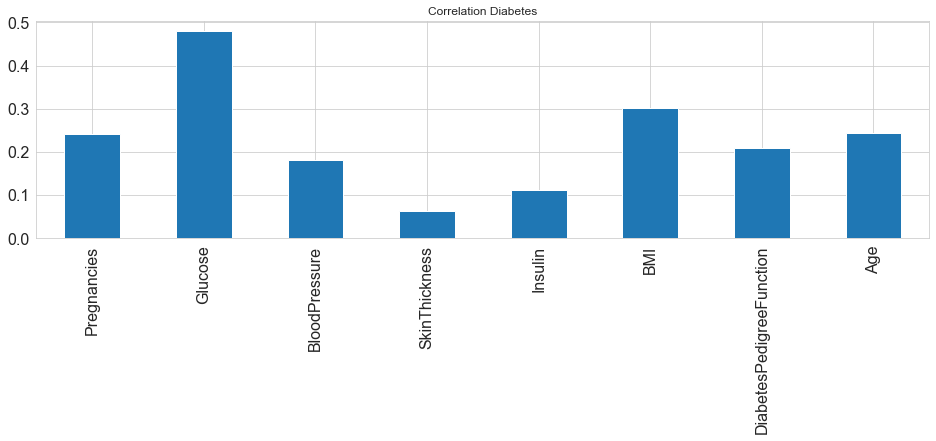

In [39]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
        figsize = (16, 4), title = "Correlation Diabetes", fontsize = 16,
        rot = 90, grid = True)